In [6]:
import nltk

In [7]:
TEXT_DIR = '../output/'

In [8]:
def buildCorpus():
    from nltk.corpus import PlaintextCorpusReader
    return PlaintextCorpusReader(TEXT_DIR, '.*')

In [9]:
corpus = buildCorpus()
fileids = corpus.fileids()
fileids = fileids[0:10]
for fileid in fileids:
    num_chars = len(corpus.raw(fileid))
    num_words = len(corpus.words(fileid))
    num_sents = len(corpus.sents(fileid))
    num_vocab = len(set([w.lower() for w in corpus.words(fileid)]))
    print(str(round(num_chars/num_words))+", "+str(round(num_words/num_sents))+", "+str(round(num_words/num_vocab))+" : "+fileid)


5, 12, 2 : aa100180.txt
5, 14, 2 : aa100355.txt
6, 14, 2 : aa100367.txt
5, 15, 5 : aa10253.txt
4, 12, 2 : aa102542.txt
5, 13, 3 : aa102611.txt
5, 13, 2 : aa102618.txt
6, 7, 1 : aa103080.txt
5, 15, 2 : aa103823.txt
6, 18, 2 : aa104339spec.txt


In [10]:
print(corpus.sents())

[['Polyhydramnios'], ['Topic', 'Overview'], ...]


_Frequenc Distribution_ - counter object - mapping of a word to an integer (its count)

If we count the number of keys, those are unique words - vocabulary
Word count = sum of the values 
Lexical diversity - average number of times a word occurs X times

In [11]:
counts  = nltk.FreqDist(corpus.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

In [12]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 106794 types and 21948380 tokens for a lexical diversity of 205.521


In [13]:
print(counts.most_common(40))

[('.', 1076636), (',', 966123), ('the', 564391), ('of', 501815), ('and', 409712), ('to', 383115), ('a', 329102), ('*', 325308), ('or', 301946), ('-', 297601), ('in', 283901), ('your', 232140), ('with', 221600), ('is', 206533), ('you', 201427), ('(', 191190), ('for', 164579), ('that', 144098), ('may', 140001), ('not', 118853), ('be', 112717), ('have', 110056), ('are', 107210), ('can', 106880), (':', 104457), ('as', 95303), ('doctor', 87068), ('if', 80933), ('chemotherapy', 79883), (')', 78256), ('The', 77872), ('by', 72216), ('vitamin', 70223), ("'", 69481), ('cancer', 69312), ('on', 67368), ('an', 60234), ('it', 59771), ('A', 59591), ('people', 57548)]


In [14]:
print(counts.hapaxes()[0:1000])

['Conjoined', 'Siamese', 'Wireless', 'Ate', 'Argument', 'Trager', 'dancelike', 'Mentastics', 'Rolfing', 'Corsets', 'critics', 'CNME', 'accredit', 'CKD', 'goong', 'headstand', 'vacuumed', 'ALH', 'bradyarrhythmias', 'allspice', 'Digest', 'refillable', 'curdling', 'crosscut', 'Disbelief', 'Disappointment', 'adust', 'snip', 'Hevea', 'brasiliensis', 'Glove', 'nonlatex', 'intelligently', 'grandchild', 'Zip', 'Interpreters', 'Accredited', 'deactivated', 'Resolve', 'unsaid', 'forgets', 'storybook', 'Tetrachloroethylene', 'ANCA', 'hypoperfusion', 'governs', 'greed', 'dosha', 'Reclosure', 'achondroplastic', 'Dalmane', 'ESIs', 'interspinous', 'unwillingly', 'Sulfinpyrazone', 'Probalan', 'instrumented', 'Novolog', 'buffers', 'NovoLog', 'dieted', 'Everywhere', 'cheapest', 'achievers', 'heliox', 'intracanal', 'dams', 'Tattooing', 'Contacts', 'Monovision', 'binocular', 'crescents', 'peroneal', 'glares', 'inaction', 'thanked', 'exchanging', 'devastated', 'Nod', 'insincere', 'Unexpressed', 'Reminding',

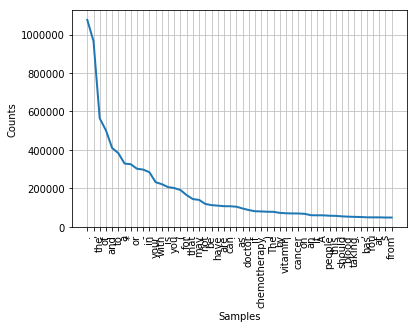

In [15]:
counts.plot(50, cumulative=False)

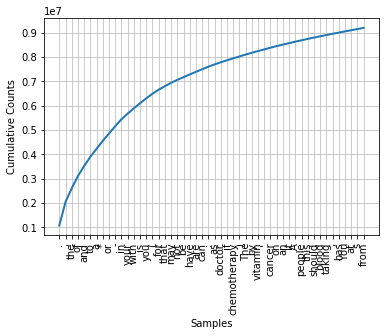

In [16]:
# By setting cumulative to True, we can visualize the cumulative counts of the _n_ most common words.
counts.plot(50, cumulative=True)


In [19]:
from gensim.models import Word2Vec
hwgensim = Word2Vec(corpus.sents())

In [23]:
hwgensim.most_similar('cancer', topn=20)

[('carcinoma', 0.6815191507339478),
 ('cancers', 0.641339898109436),
 ('melanoma', 0.6161998510360718),
 ('carcinogenesis', 0.6156816482543945),
 ('adenocarcinomas', 0.5889794826507568),
 ('adenocarcinoma', 0.5833908319473267),
 ('CRC', 0.5158604383468628),
 ('carcinomas', 0.5116673707962036),
 ('SCC', 0.5014102458953857),
 ('enlargement', 0.4903922379016876),
 ('reconstruction', 0.48922961950302124),
 ('BCC', 0.4822159707546234),
 ('polyps', 0.47860169410705566),
 ('adenomas', 0.4668273329734802),
 ('rhabdomyosarcoma', 0.46415552496910095),
 ('malignancies', 0.4637780487537384),
 ('Cancer', 0.454182505607605),
 ('tumor', 0.45324477553367615),
 ('neoplasia', 0.44525402784347534),
 ('fissures', 0.4449499547481537)]

In [24]:
hwgensim.most_similar('blood', topn=20)

[('inspiratory', 0.6009636521339417),
 ('Blood', 0.5993154048919678),
 ('cytometry', 0.5905686616897583),
 ('peak', 0.5477820634841919),
 ('busting', 0.5413093566894531),
 ('atmospheric', 0.5278486013412476),
 ('expiratory', 0.5223292708396912),
 ('intraocular', 0.5151267051696777),
 ('sperm', 0.5065816640853882),
 ('air', 0.5034570693969727),
 ('platelet', 0.4937816560268402),
 ('airway', 0.4885348677635193),
 ('lungs', 0.4849148392677307),
 ('bloodstream', 0.4741634726524353),
 ('aplasia', 0.4702532887458801),
 ('IOP', 0.4674679934978485),
 ('cytometric', 0.4603503346443176),
 ('accumulate', 0.44844192266464233),
 ('serum', 0.4365060329437256),
 ('diastolic', 0.4332091212272644)]

In [34]:
hwgensim.most_similar('hope', topn=20)

[('We', 0.8908767700195312),
 ('resource', 0.7466868758201599),
 ('provides', 0.5922198295593262),
 ('accomplish', 0.5047870874404907),
 ('disclose', 0.5008730888366699),
 ('informed', 0.4688451886177063),
 ('booklet', 0.4472050070762634),
 ('struggle', 0.434073805809021),
 ('trust', 0.43225735425949097),
 ('claim', 0.4314434826374054),
 ('experiment', 0.4257565438747406),
 ('verify', 0.4245222806930542),
 ('citation', 0.42093926668167114),
 ('address', 0.4068673253059387),
 ('remedy', 0.4022448658943176),
 ('approach', 0.3983720541000366),
 ('deal', 0.3965657651424408),
 ('nutritionist', 0.3965078294277191),
 ('strategy', 0.395305335521698),
 ('appreciate', 0.3943217992782593)]

In [35]:
hwgensim.similarity('cancer', 'tumor')

0.45324480116620092

In [33]:
hwgensim.save("../models/hwgensimv1.bin")